<a href="https://colab.research.google.com/github/javamohammed/TitanicSurvivalML/blob/main/Logistic_Regression_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT

The sinking of the Titanic on April 15th, 1912 is one of the most tragic tragedies in history. The Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers. The numbers of survivors were low due to the lack of lifeboats for all passengers and crew. Some passengers were more likely to survive than others, such as women, children, and upper-class. This case study analyzes what sorts of people were likely to survive this tragedy. The dataset includes the following:

- Pclass:	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Sex:    Sex
- Age:    Age in years
- Sibsp:	# of siblings / spouses aboard the Titanic
- Parch:	# of parents / children aboard the Titanic
- Ticket:	Ticket number
- Fare:	Passenger fare
- Cabin:	Cabin number
- Embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


- Target class: Survived: Survival	(0 = No, 1 = Yes)


# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #1: IMPORT DATASET

In [51]:
TrainTitanicData = pd.read_csv("/content/Train_Titanic.csv")

In [3]:
TrainTitanicData.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
TrainTitanicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
TrainTitanicData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
TrainTitanicData[TrainTitanicData['Age'].isna() | TrainTitanicData['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# STEP #2: EXPLORE/VISUALIZE DATASET

In [18]:
survived = TrainTitanicData[TrainTitanicData['Survived'] == 1]
no_survived = TrainTitanicData[TrainTitanicData['Survived'] == 0]

In [19]:
print('Total =', len(TrainTitanicData))

Total = 891


In [21]:
print('Number of Survived passengers = ', len(survived))
print('Percentage Survived = ', len(survived)/len(TrainTitanicData) * 100 , '%' )

Number of Survived passengers =  342
Percentage Survived =  38.38383838383838 %


In [22]:
print('Number of NO Survived passengers = ', len(no_survived))
print('Percentage NO Survived = ', len(no_survived)/len(TrainTitanicData) * 100 , '%' )

Number of NO Survived passengers =  549
Percentage NO Survived =  61.61616161616161 %


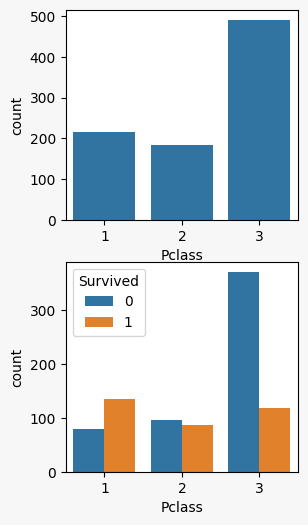

In [30]:
plt.figure(figsize=[3, 6], facecolor='#F7F7F7')
plt.subplot(211)
sns.countplot( x='Pclass', data=TrainTitanicData)
plt.subplot(212)
sns.countplot( x='Pclass', hue='Survived', data=TrainTitanicData)
plt.show()

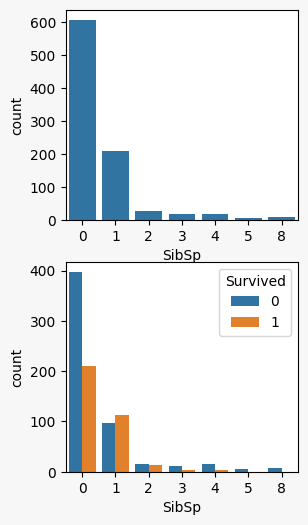

In [31]:
plt.figure(figsize=[3, 6], facecolor='#F7F7F7')
plt.subplot(211)
sns.countplot( x='SibSp', data=TrainTitanicData)
plt.subplot(212)
sns.countplot( x='SibSp', hue='Survived', data=TrainTitanicData)
plt.show()

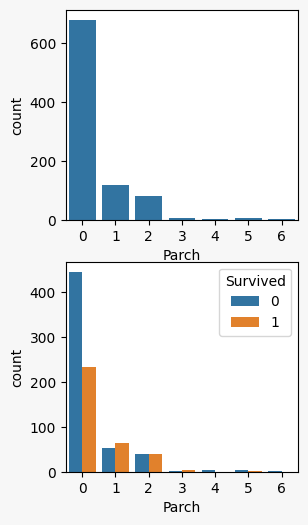

In [32]:
plt.figure(figsize=[3, 6], facecolor='#F7F7F7')
plt.subplot(211)
sns.countplot( x='Parch', data=TrainTitanicData)
plt.subplot(212)
sns.countplot( x='Parch', hue='Survived', data=TrainTitanicData)
plt.show()

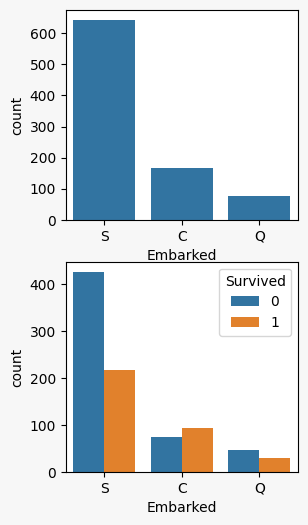

In [33]:
plt.figure(figsize=[3, 6], facecolor='#F7F7F7')
plt.subplot(211)
sns.countplot( x='Embarked', data=TrainTitanicData)
plt.subplot(212)
sns.countplot( x='Embarked', hue='Survived', data=TrainTitanicData)
plt.show()

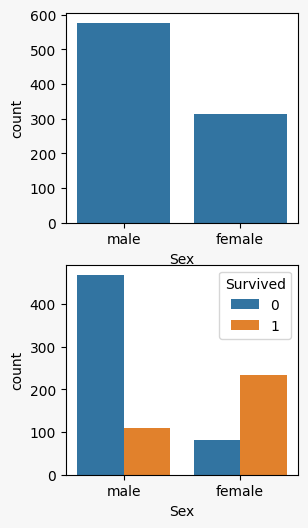

In [34]:
plt.figure(figsize=[3, 6], facecolor='#F7F7F7')
plt.subplot(211)
sns.countplot( x='Sex', data=TrainTitanicData)
plt.subplot(212)
sns.countplot( x='Sex', hue='Survived', data=TrainTitanicData)
plt.show()

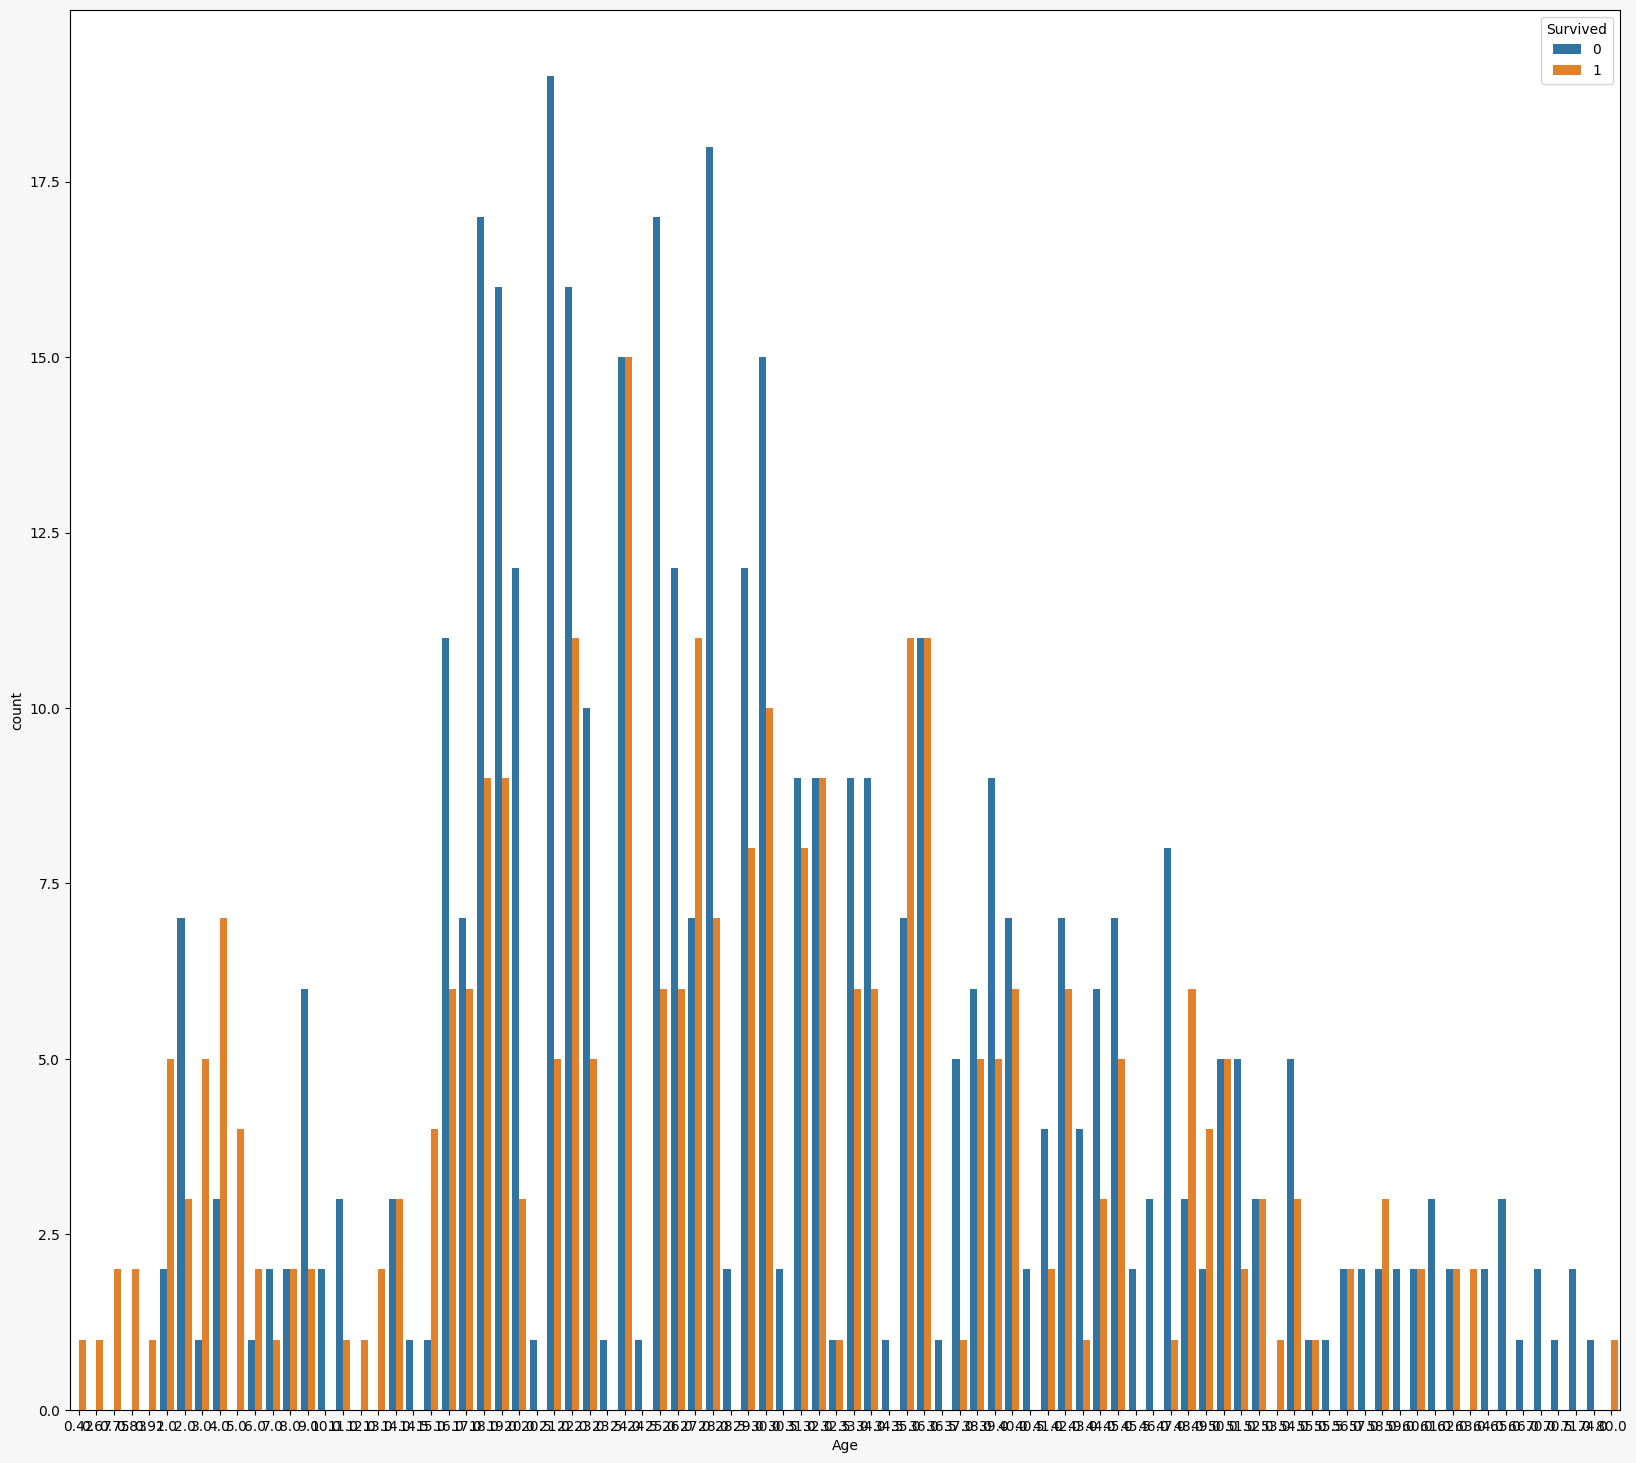

In [36]:
plt.figure(figsize=[20, 40], facecolor='#F7F7F7')
plt.subplot(211)
sns.countplot( x='Age', hue='Survived', data=TrainTitanicData)
plt.show()

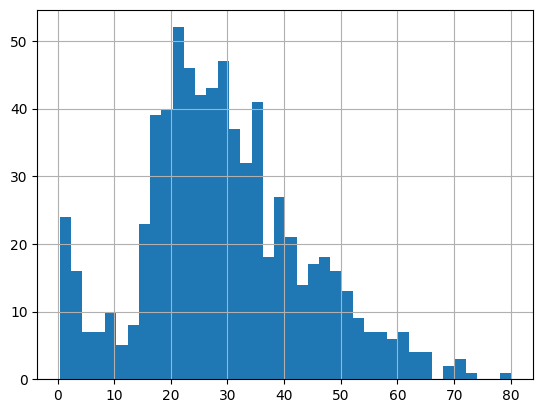

In [38]:
TrainTitanicData['Age'].hist(bins=40)
plt.show()

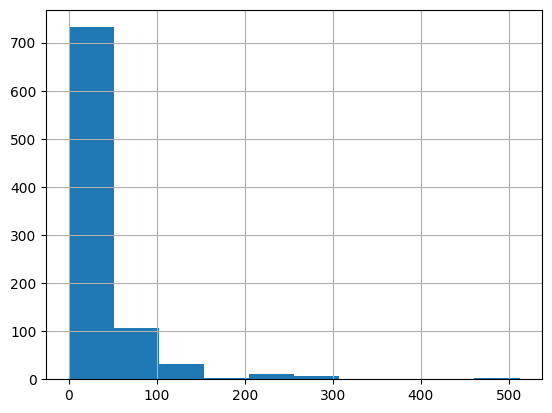

In [41]:
TrainTitanicData['Fare'].hist(bins=10)
plt.show()

# STEP #3: PREPARE THE DATA FOR TRAINING/ DATA CLEANING

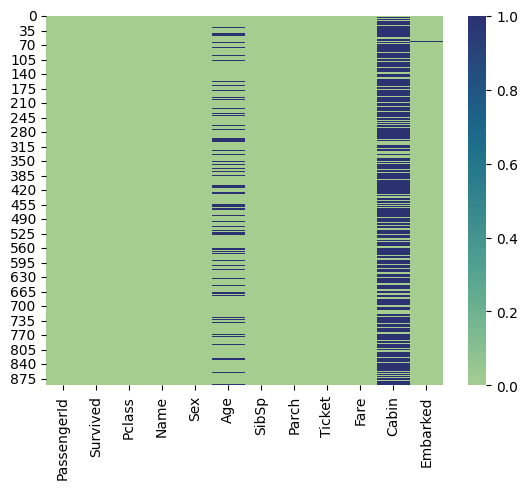

In [52]:
sns.heatmap(data=TrainTitanicData.isnull(), cmap='crest')
plt.show()

In [54]:
TrainTitanicData.drop(columns=['Cabin'], axis=1, inplace=True)

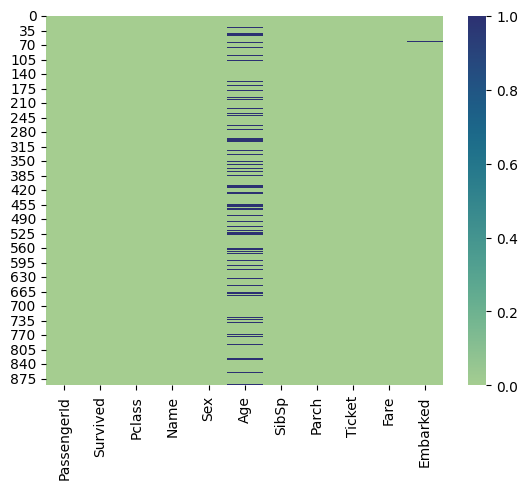

In [55]:
sns.heatmap(data=TrainTitanicData.isnull(), cmap='crest')
plt.show()

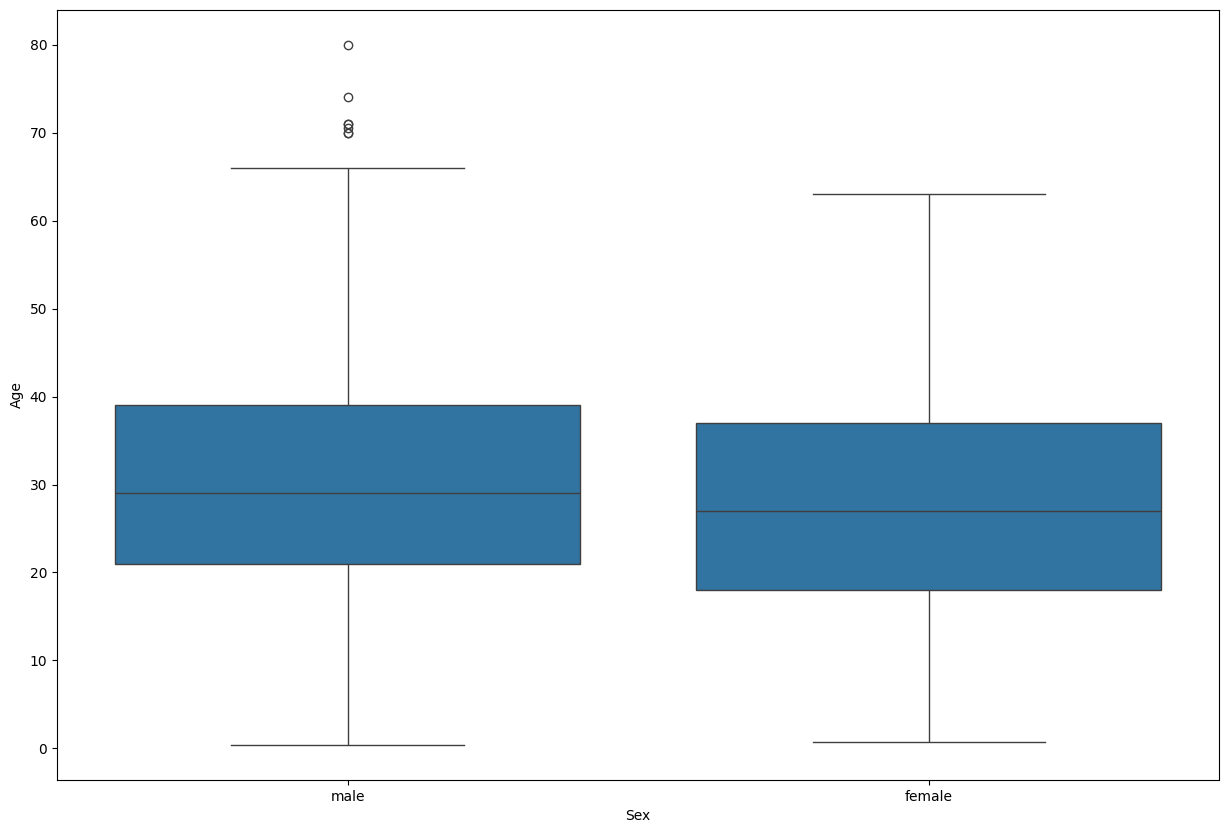

In [56]:
plt.figure(figsize=(15, 10))
sns.boxplot(x= 'Sex', y='Age', data=TrainTitanicData)
plt.show()

In [58]:
def fill_Age(data):
  sex = data[1]
  age = data[0]
  if pd.isnull(age):
    if sex == 'Male':
      return 29
    else:
      return 25
  else:
    return age

In [59]:
TrainTitanicData['Age'] = TrainTitanicData[['Sex', 'Age']].apply(fill_Age, axis=1)

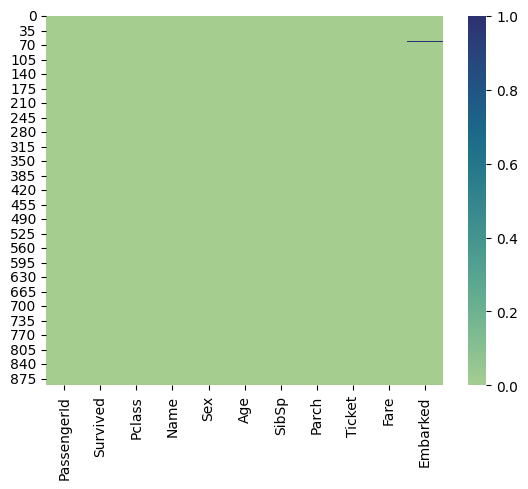

In [60]:
sns.heatmap(data=TrainTitanicData.isnull(), cmap='crest')
plt.show()

In [63]:
TrainTitanicData[TrainTitanicData['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [64]:
TrainTitanicData.dropna(axis=0, inplace=True)

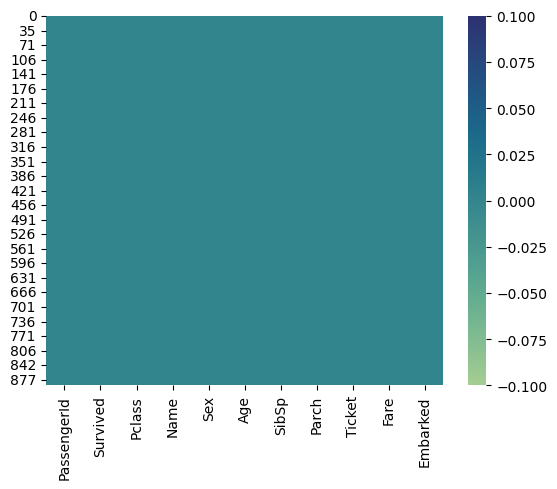

In [65]:
sns.heatmap(data=TrainTitanicData.isnull(), cmap='crest')
plt.show()

In [67]:
TrainTitanicData.drop(columns=['Name', 'Ticket', 'Embarked', 'PassengerId'], axis=1, inplace=True)
TrainTitanicData.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [71]:
TrainTitanicData = pd.get_dummies(columns=['Sex'], data=TrainTitanicData, dtype='int', drop_first=True)

In [73]:
TrainTitanicData.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


# STEP#4: MODEL TRAINING

In [91]:
X = TrainTitanicData.iloc[:, 1:].values
y = TrainTitanicData.iloc[:, 0:1].values

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [93]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train.ravel())

LogisticRegression()

# STEP#5: MODEL TESTING

In [96]:
y_predict_test = model.predict(X=X_test)

In [97]:
model.score(X=X_test, y=y_test)

0.8202247191011236

In [98]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predict_test)

<Axes: >

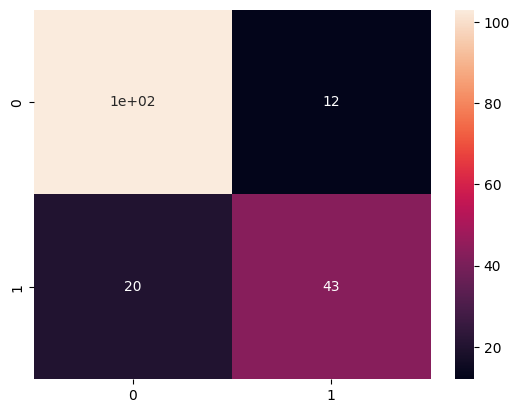

In [100]:
sns.heatmap(cm, annot=True)

In [101]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       115
           1       0.78      0.68      0.73        63

    accuracy                           0.82       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.82      0.82      0.82       178

